In [1]:
import pandas as pd

In [54]:
# Read the CSV file into a DataFrame
rst = pd.read_csv('respiratory symptoms and treatment.csv')

In [55]:
# Get the shape of the DataFrame
rst.shape

(38537, 6)

In [56]:
# Get descriptive statistics for all columns
rst.describe(include='all')

,Symptoms,Age,Sex,Disease,Treatment,Nature
count,37841,38195.000000,37615,38197,35696,36347
unique,92,NaN,3,18,33,4
top,shortness of breath,NaN,male,Pneumonia,antibiotics,high
freq,3005,NaN,21256,6144,5135,22637
mean,NaN,36.997356,NaN,NaN,NaN,NaN
std,NaN,27.713575,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,NaN,NaN
50%,NaN,30.000000,NaN,NaN,NaN,NaN
75%,NaN,63.000000,NaN,NaN,NaN,NaN


In [57]:
# Check the data types of each column
rst.dtypes

Symptoms      object
Age          float64
Sex           object
Disease       object
Treatment     object
Nature        object
dtype: object

In [58]:
# Remove leading and trailing spaces in the DataFrame
rst = rst.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [59]:
# Display the first few rows of the DataFrame
rst.head()

,Symptoms,Age,Sex,Disease,Treatment,Nature
0,coughing,5.0,female,Asthma,Omalizumab,high
1,tight feeling in the chest,4.0,female,Asthma,Mepolizumab,high
2,wheezing,6.0,male,Asthma,Mepolizumab,high
3,shortness of breath,7.0,male,Asthma,Mepolizumab,high
4,shortness of breath,9.0,male,Asthma,Mepolizumab,high


In [60]:
# Check the count of missing values in each column
rst.isna().sum()

Symptoms      696
Age           342
Sex           922
Disease       340
Treatment    2841
Nature       2190
dtype: int64

In [61]:
# Delete columns where Sex is undisclosed or unknown
rst = rst.drop(rst[(rst['Sex'] != 'male') & (rst['Sex'] != 'female')].index)
rst = rst.dropna(subset =['Sex'])

# Drop rows with missing values in the Sex and Age column
rst = rst.dropna(subset=['Sex'])
rst = rst.dropna(subset=['Age'])

In [62]:
# Convert the Age column to integer data type
rst['Age'] = rst['Age'].astype(int)

In [63]:
# Reset the index of the DataFrame
rst.reset_index(drop=True, inplace=True)

In [64]:
# Categorize Age into Age_Group based on specified conditions
rst.loc[rst['Age'] <= 12, 'Age_Group'] = 'Pediatrics'
rst.loc[(rst['Age'] >= 13) & (rst['Age'] <= 17), 'Age_Group'] = 'Adolescents'
rst.loc[(rst['Age'] >= 18) & (rst['Age'] <= 35), 'Age_Group'] = 'Young Adults'
rst.loc[(rst['Age'] >= 36) & (rst['Age'] <= 64), 'Age_Group'] = 'Adults'
rst.loc[rst['Age'] >= 65, 'Age_Group'] = 'Elderly'

In [65]:
# Display the first few rows of the modified DataFrame
rst.head()

,Symptoms,Age,Sex,Disease,Treatment,Nature,Age_Group
0,coughing,5,female,Asthma,Omalizumab,high,Pediatrics
1,tight feeling in the chest,4,female,Asthma,Mepolizumab,high,Pediatrics
2,wheezing,6,male,Asthma,Mepolizumab,high,Pediatrics
3,shortness of breath,7,male,Asthma,Mepolizumab,high,Pediatrics
4,shortness of breath,9,male,Asthma,Mepolizumab,high,Pediatrics


In [66]:
# Drop rows where both "Disease" and "Treatment" columns are null
rst.dropna(subset = ['Disease', 'Treatment'], how = 'all', inplace = True)

In [67]:
# Drop rows where both "Nature" and "Treatment" columns are null
rst.dropna(subset = ['Nature', 'Treatment'], how ='all', inplace = True)

In [68]:
# Drop rows where both "Disease" and "Nature" columns are null
rst.dropna(subset = ['Disease', 'Nature'], how ='all', inplace = True)

In [69]:
# Fill missing values in the "Disease" and "Treatment" column with "Unknown"
rst['Disease'].fillna('Unknown', inplace= True)
rst['Treatment'].fillna('Unknown', inplace= True)

In [70]:
# Drop rows with missing values in the "Symptoms" and "Nature" column
rst = rst.dropna(subset =['Symptoms'])
rst = rst.dropna(subset =['Nature'])

In [71]:
# Check the count of missing values in each column again
rst.isna().sum()

Symptoms     0
Age          0
Sex          0
Disease      0
Treatment    0
Nature       0
Age_Group    0
dtype: int64

In [72]:
# Remove periods from the Treatment column
rst['Treatment'] = rst['Treatment'].str.replace('.', '')

# Change "Antibiotic" and "antibiotic" to "Antibiotics" in the Treatment column
rst['Treatment'] = rst['Treatment'].str.replace('Antibiotic', 'Antibiotics', case=False)
rst.loc[rst['Treatment'] == 'Antibioticss', 'Treatment'] = 'Antibiotics'

In [73]:
# Reorder the columns of interest in the DataFrame
rst = rst[['Age', 'Age_Group', 'Sex', 'Symptoms', 'Disease', 'Nature', 'Treatment']].reset_index(drop=True)

In [74]:
# Save the modified DataFrame to a new CSV file
rst.to_csv('Respiratory ST.csv', index=False)

*<codeB> **Exploratory Data Analysis & Visualizations** <codeB>*

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline 

In [24]:
rst = pd.read_csv("Respiratory ST.csv")

In [25]:
# Get descriptive statistics for all columns in the modified DataFrame
rst.describe(include='all')

,Age,Age_Group,Sex,Symptoms,Disease,Nature,Treatment
count,34016.000000,34016,34016,34016,34016,34016,34016
unique,NaN,5,2,84,19,3,31
top,NaN,Pediatrics,male,shortness of breath,Pneumonia,high,Antibiotics
freq,NaN,9719,19450,2987,5184,21272,8604
mean,37.542421,NaN,NaN,NaN,NaN,NaN,NaN
std,27.816988,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,63.000000,NaN,NaN,NaN,NaN,NaN,NaN


*<codeB>We have 84 **Symptoms**, 2 **Sexes**, 18 **Diseases**, 33 **Treatments/Medications**, 3 **Natures** & 5 **Age Groups**<codeB>*

| Sn | Sex | Nature | Age Group |
| :-: | :-: | :----: | :-------: |
| 1 | Male | Low | Pediatrics |
| 2 | Female | Medium | Adolescents |
| 3 |  | High | Young Adults |
| 4 |  |  | Adults |
| 5 |  |  | Elderly |

In [26]:
# Load the SQL extension for Jupyter Notebook
%load_ext sql

In [27]:
# Connect to the SQLite database
%sql sqlite:///RST.db

In [28]:
import csv, sqlite3

# Connect to the SQLite database
con = sqlite3.connect("RST.db")
cur = con.cursor()

In [29]:
# Create a table in the database and import the DataFrame into it
rst.to_sql("rst", con, if_exists='replace', index=False)

34016

In [30]:
%%sql

--Execute an SQL query to select the first 5 rows from the "rst" table
SELECT *
FROM rst
LIMIT 5

 * sqlite:///RST.db
Done.


Age,Age_Group,Sex,Symptoms,Disease,Nature,Treatment
5,Pediatrics,female,coughing,Asthma,high,Omalizumab
4,Pediatrics,female,tight feeling in the chest,Asthma,high,Mepolizumab
6,Pediatrics,male,wheezing,Asthma,high,Mepolizumab
7,Pediatrics,male,shortness of breath,Asthma,high,Mepolizumab
9,Pediatrics,male,shortness of breath,Asthma,high,Mepolizumab


In [31]:
%%sql

-- Most effective Treatment/Medication for All Disease Natures
SELECT Treatment, COUNT(Treatment) AS Frequency
FROM rst
GROUP BY Treatment
ORDER BY Frequency DESC
LIMIT 5;

 * sqlite:///RST.db
Done.


Treatment,Frequency
Antibiotics,8604
Chemotherapy,2880
isotonic sodium chloride solution,2448
Oseltamivir,1872
Unknown,1829


 * sqlite:///RST.db
Done.


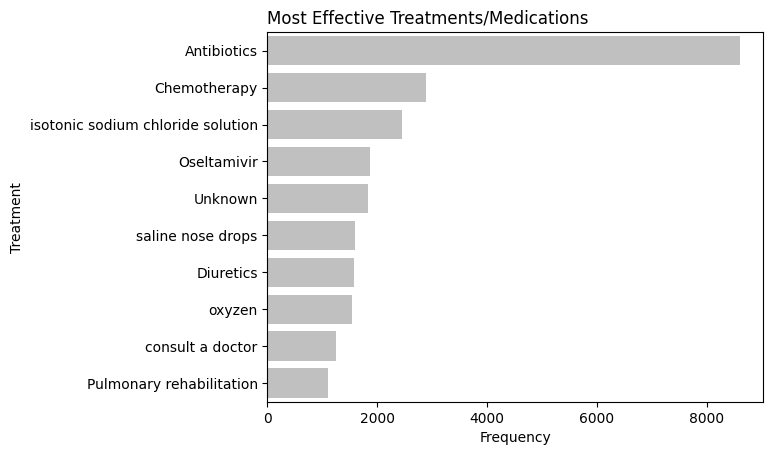

In [32]:
# Fetch the query result
Eff_T = %sql SELECT Treatment, COUNT(Treatment) AS Frequency FROM rst GROUP BY Treatment ORDER BY Frequency DESC LIMIT 10

# Convert the query result to a Pandas DataFrame
Eff_T = Eff_T.DataFrame()

# Create a Seaborn bar plot to visualize the Treatment frequencies
sns.barplot(x='Frequency', y='Treatment', data=Eff_T, color= 'silver')
plt.title('Most Effective Treatments/Medications', loc = 'left')

# Display the plot
plt.show()

In [33]:
%%sql

-- Most effective Treatments/Medications for High Nature (Severe) Diseases
SELECT Treatment, COUNT(Treatment) AS Frequency
FROM rst
WHERE Nature = 'high'
GROUP BY Treatment
ORDER BY Frequency DESC
LIMIT 5;

 * sqlite:///RST.db
Done.


Treatment,Frequency
Chemotherapy,2880
isotonic sodium chloride solution,2448
Oseltamivir,1872
Diuretics,1584
oxyzen,1488


 * sqlite:///RST.db
Done.


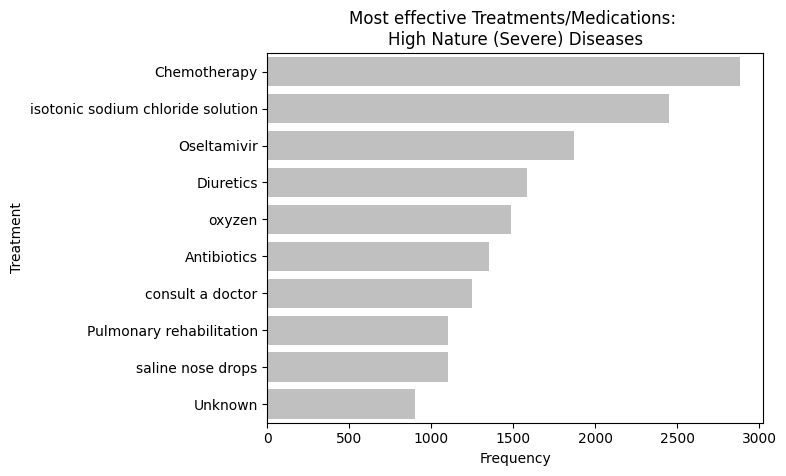

In [34]:
# Fetch the query result
Eff_H = %sql SELECT Treatment, COUNT(Treatment) AS Frequency FROM rst WHERE Nature = 'high' GROUP BY Treatment ORDER BY Frequency DESC LIMIT 10

# Convert the query result to a Pandas DataFrame
Eff_H = Eff_H.DataFrame()

# Create a Seaborn bar plot to visualize the Treatment frequencies
sns.barplot(x='Frequency', y='Treatment', data=Eff_H, color = 'silver')
plt.title('Most effective Treatments/Medications: \nHigh Nature (Severe) Diseases', loc = 'center')

# Display the plot
plt.show()

In [35]:
%%sql

-- Most effective Treatments/Medications for Medium Nature (Moderate) Diseases
SELECT Treatment, COUNT(Treatment) AS Frequency
FROM rst
WHERE Nature = 'medium'
GROUP BY Treatment
ORDER BY Frequency DESC
LIMIT 5;

 * sqlite:///RST.db
Done.


Treatment,Frequency
Antibiotics,7252
Unknown,932
Cough medicine,912
Adaptive servo-ventilation,768
steroids to reduce inflammation,480


 * sqlite:///RST.db
Done.


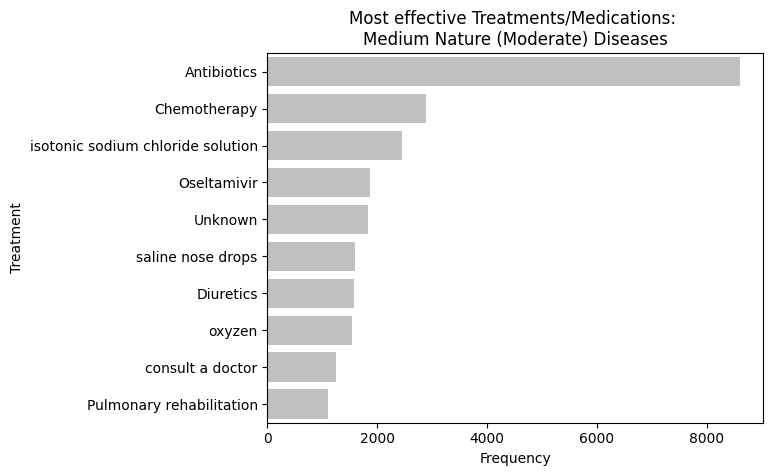

In [36]:
# Fetch the query result
Eff_M = %sql SELECT Treatment, COUNT(Treatment) AS Frequency FROM rst WHERE Nature = 'medium' GROUP BY Treatment ORDER BY Frequency DESC LIMIT 10

# Convert the query result to a Pandas DataFrame
Eff_M = Eff_M.DataFrame()

# Create a Seaborn bar plot to visualize the Treatment frequencies
sns.barplot(x='Frequency', y='Treatment', data=Eff_T, color= 'silver')
plt.title('Most effective Treatments/Medications: \nMedium Nature (Moderate) Diseases', loc = 'center')

# Display the plot
plt.show()

In [37]:
%%sql

-- Most effective Treatments/Medications for Low Nature (Mild) Diseases
SELECT Treatment, COUNT(Treatment) AS Frequency
FROM rst
WHERE Nature = 'low'
GROUP BY Treatment
ORDER BY Frequency DESC
LIMIT 5;

 * sqlite:///RST.db
Done.


Treatment,Frequency
itraconazole,144
saline nose drops,125
consult doctor,96


# Fetch the query result
Eff_L = %sql SELECT Treatment, COUNT(Treatment) AS Frequency FROM rst WHERE Nature = 'low' GROUP BY Treatment ORDER BY Frequency DESC LIMIT 10

# Convert the query result to a Pandas DataFrame
Eff_L = Eff_L.DataFrame()

# Set a color palette
colors = sns.color_palette('pastel')[0:len(Eff_T)]

# Create the pie chart
plt.figure(figsize = (6, 5))
plt.pie(Eff_L['Frequency'], colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
# Add a title
plt.title('Most Effective Treatments/Medications: \nLow Nature (Mild) Diseases')

# Add legends
plt.legend(title='Treatment', labels=Eff_L['Treatment'], bbox_to_anchor=(1, 0), loc='lower right')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

In [38]:
%%sql

--Most Occuring nature of diseases
SELECT Disease, COUNT(*) AS Frequency, Nature
FROM rst
GROUP BY Disease, Nature
ORDER BY Nature DESC, Nature, COUNT(*) DESC
;

 * sqlite:///RST.db
Done.


Disease,Frequency,Nature
Pneumonia,5184,medium
bronchitis,3559,medium
bronchiolitis,950,medium
Chronic Bronchitis,816,medium
sleep apnea,816,medium
Asthma,448,medium
Chronic cough,192,medium
Acute Respiratory Distress Syndrome,144,medium
Bronchiectasis,125,medium
Asbestosis,96,medium


In [39]:
# Fetch the query result
c = %sql SELECT Disease, COUNT(*) AS Frequency, Nature FROM rst GROUP BY Disease, Nature ORDER BY Nature DESC, Nature, COUNT(*) DESC 
# Convert the query result to a Pandas DataFrame
c = c.DataFrame()

 * sqlite:///RST.db
Done.


In [40]:
c = c.groupby ('Nature')[['Frequency']].sum()
c = c.reset_index()

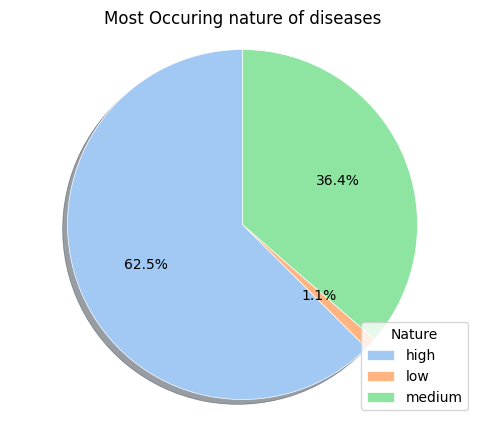

In [41]:
# Create the pie chart
plt.figure(figsize = (6, 5))
plt.pie(c['Frequency'], colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
# Add a title
plt.title('Most Occuring nature of diseases')

# Add legends
plt.legend(title='Nature', labels=c['Nature'], bbox_to_anchor=(1, 0), loc='lower right')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

In [42]:
%%sql

--Execute an SQL query to select the disease, sex, and maximum affected count for each disease
SELECT Disease, Sex, MAX(Count) AS MaxAffectedCount
FROM (
    SELECT Disease, Sex, COUNT(*) AS Count
    FROM rst
    GROUP BY Disease, Sex
) AS subquery
GROUP BY Disease
ORDER BY MaxAffectedCount DESC;

 * sqlite:///RST.db
Done.


Disease,Sex,MaxAffectedCount
Pneumonia,male,3216
bronchitis,male,2723
chronic obstructive pulmonary disease,male,2400
Mesothelioma,male,1920
Pneumothorax,male,1488
bronchiolitis,male,1350
Chronic Bronchitis,female,1200
Influenza,male,1104
Pulmonary hypertension,male,1056
Bronchiectasis,female,875


 * sqlite:///RST.db
Done.


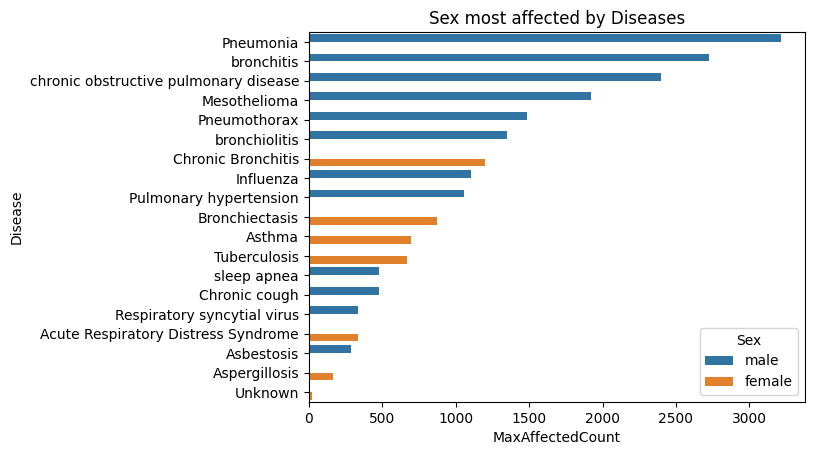

In [43]:
# Fetch the query result
Sex_aff = %sql SELECT Disease, Sex, MAX(Count) AS MaxAffectedCount FROM (SELECT Disease, Sex, COUNT(*) AS Count FROM rst GROUP BY Disease, Sex) AS subquery GROUP BY Disease ORDER BY MaxAffectedCount DESC

# Convert the query result to a Pandas DataFrame
Sex_aff = Sex_aff.DataFrame()

# Create a Seaborn bar plot to visualize the maximum affected count by Disease and Sex
sns.barplot(y='Disease', x='MaxAffectedCount', hue='Sex', data=Sex_aff)
plt.title('Sex most affected by Diseases')

# Display the plot
plt.show()

In [44]:
%%sql

-- Disease affection rates per sex
SELECT Sex, COUNT(*) AS disease_count
FROM rst
GROUP BY Sex
ORDER BY disease_count DESC;

 * sqlite:///RST.db
Done.


Sex,disease_count
male,19450
female,14566


 * sqlite:///RST.db
Done.


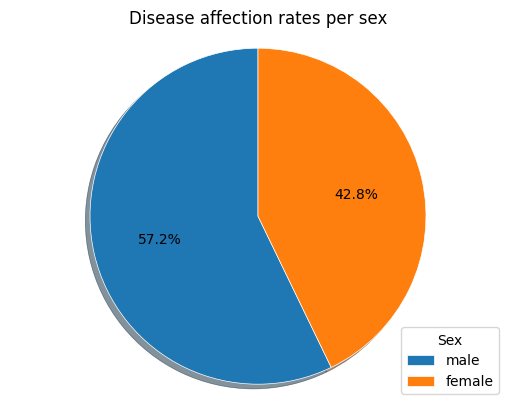

In [44]:
# Fetch the query result
most_sex = %sql SELECT Sex, COUNT(*) AS disease_count FROM rst GROUP BY Sex ORDER BY disease_count DESC

# Convert the query result to a Pandas DataFrame
most_sex = most_sex.DataFrame()

# Set a color palette
#colors = sns.color_palette('pastel')[0:len(most_sex)]

# Create the pie chart
plt.pie(most_sex['disease_count'], autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})

# Add a title
plt.title('Disease affection rates per sex')

# Add legends
plt.legend(title='Sex', labels=most_sex['Sex'], bbox_to_anchor=(1, 0), loc='lower right')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

In [45]:
%%sql

--Execute an SQL query to select the disease and the concatenated symptoms for each disease
SELECT Disease, GROUP_CONCAT(DISTINCT Symptoms) AS Symptoms
FROM rst
GROUP BY Disease;

 * sqlite:///RST.db
Done.


Disease,Symptoms
Acute Respiratory Distress Syndrome,"short of breath,distressing,faster heart beating,pain,cough"
Asbestosis,"Shortness of breath,Persistent dry cough,Weight loss from loss of appetite,A dry, crackling sound in the lungs while breathing in,Wider and rounder than normal fingertips and toes,Persistent dry coug"
Aspergillosis,"shortness of breath,fatigue,weight loss,wheezing"
Asthma,"coughing,tight feeling in the chest,wheezing,shortness of breath,fever,cold,allergy"
Bronchiectasis,"Coughing up yellow or green mucus daily,Shortness of breath that gets worse during flare-ups,Fatigue, feeling run-down or tired,fever,whistling sound while you breathe,Wheezing,Chest pain,Coughing up blood,coughing"
Chronic Bronchitis,"mucus,wheezing,Wheezing,chest pain,shortness of breath"
Chronic cough,"cold,shortness of breath"
Influenza,"high fever,Headache,muscle aches,joint pain,cough,Chills,Sore throat,Nasal congestion,runny nose,Fatigue,nausea,vomiting,diarrhea"
Mesothelioma,"shortness of breath,chest pain,lower back pain,dry cough"
Pneumonia,"greenish cough,yellow cough,cough with blood,Fever,sweating,shaking,shortness of breath,Rapid breathing,shallow breathing,chest pain,low energy,Loss of appetite,fatigue,Nausea,vomiting,cold"


In [46]:
%%sql

--Execute an SQL query to select the disease, age group, and maximum frequency for each disease
SELECT Disease, Age_Group, MAX(Frequency) AS Frequency
FROM (
    SELECT Disease, Age_Group, COUNT(*) AS Frequency
    FROM rst
    GROUP BY Disease, Age_Group
) AS Subquery
GROUP BY Disease
ORDER BY Frequency DESC;

 * sqlite:///RST.db
Done.


Disease,Age_Group,Frequency
bronchitis,Pediatrics,2527
Pneumonia,Adults,1248
chronic obstructive pulmonary disease,Adults,1104
Mesothelioma,Adults,1008
bronchiolitis,Pediatrics,975
Bronchiectasis,Pediatrics,900
Pneumothorax,Elderly,768
Chronic Bronchitis,Pediatrics,720
Tuberculosis,Adults,672
Pulmonary hypertension,Pediatrics,624


 * sqlite:///RST.db
Done.


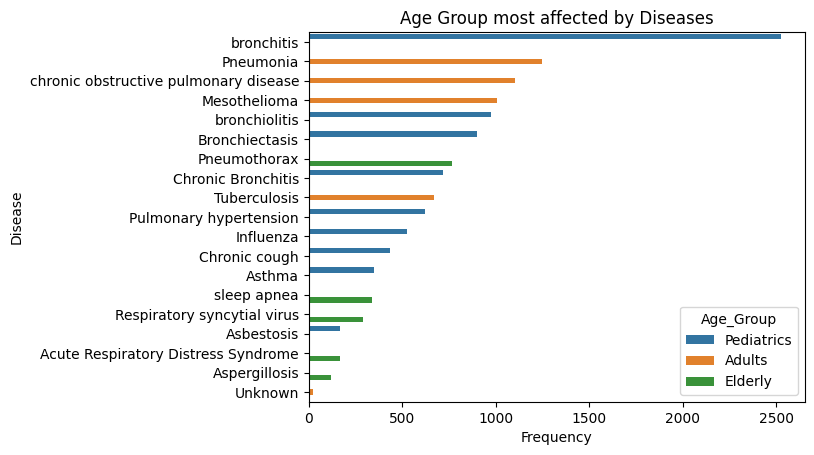

In [47]:
# Fetch the query result
Dis_AG = %sql SELECT Disease, Age_Group, MAX(Frequency) AS Frequency FROM (SELECT Disease, Age_Group, COUNT(*) AS Frequency FROM rst GROUP BY Disease, Age_Group) AS Subquery GROUP BY Disease ORDER BY Frequency DESC

# Convert the query result to a Pandas DataFrame
Dis_AG = Dis_AG.DataFrame()

# Create a Seaborn bar plot to visualize the maximum frequency by Disease and Age_Group
sns.barplot(y ='Disease', x ='Frequency', hue='Age_Group', data=Dis_AG)
plt.title('Age Group most affected by Diseases')

# Display the plot
plt.show()

In [48]:
%%sql

-- Age group more susceptible to diseases
SELECT Age_Group, COUNT(Disease) AS Frequency
FROM rst
GROUP BY Age_Group
ORDER BY Frequency DESC
LIMIT 5;

 * sqlite:///RST.db
Done.


Age_Group,Frequency
Pediatrics,9719
Adults,8058
Elderly,7929
Adolescents,4781
Young Adults,3529


 * sqlite:///RST.db
Done.


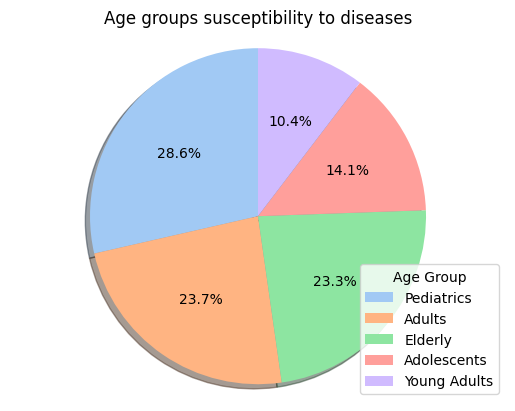

In [48]:
# Fetch the query result
result = %sql SELECT Age_Group, COUNT(Disease) AS Frequency FROM rst GROUP BY Age_Group ORDER BY Frequency DESC LIMIT 5

# Convert the query result to a Pandas DataFrame
df = result.DataFrame()

# Set a color palette
colors = sns.color_palette('pastel')

# Create a pie chart to visualize the Disease frequency by Age_Group
plt.pie(df['Frequency'], colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)

# Add a title
plt.title('Age groups susceptibility to diseases')

# Add legends
plt.legend(title='Age Group', labels=df['Age_Group'], bbox_to_anchor=(1, 0), loc='lower right')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Display the plot
plt.show()


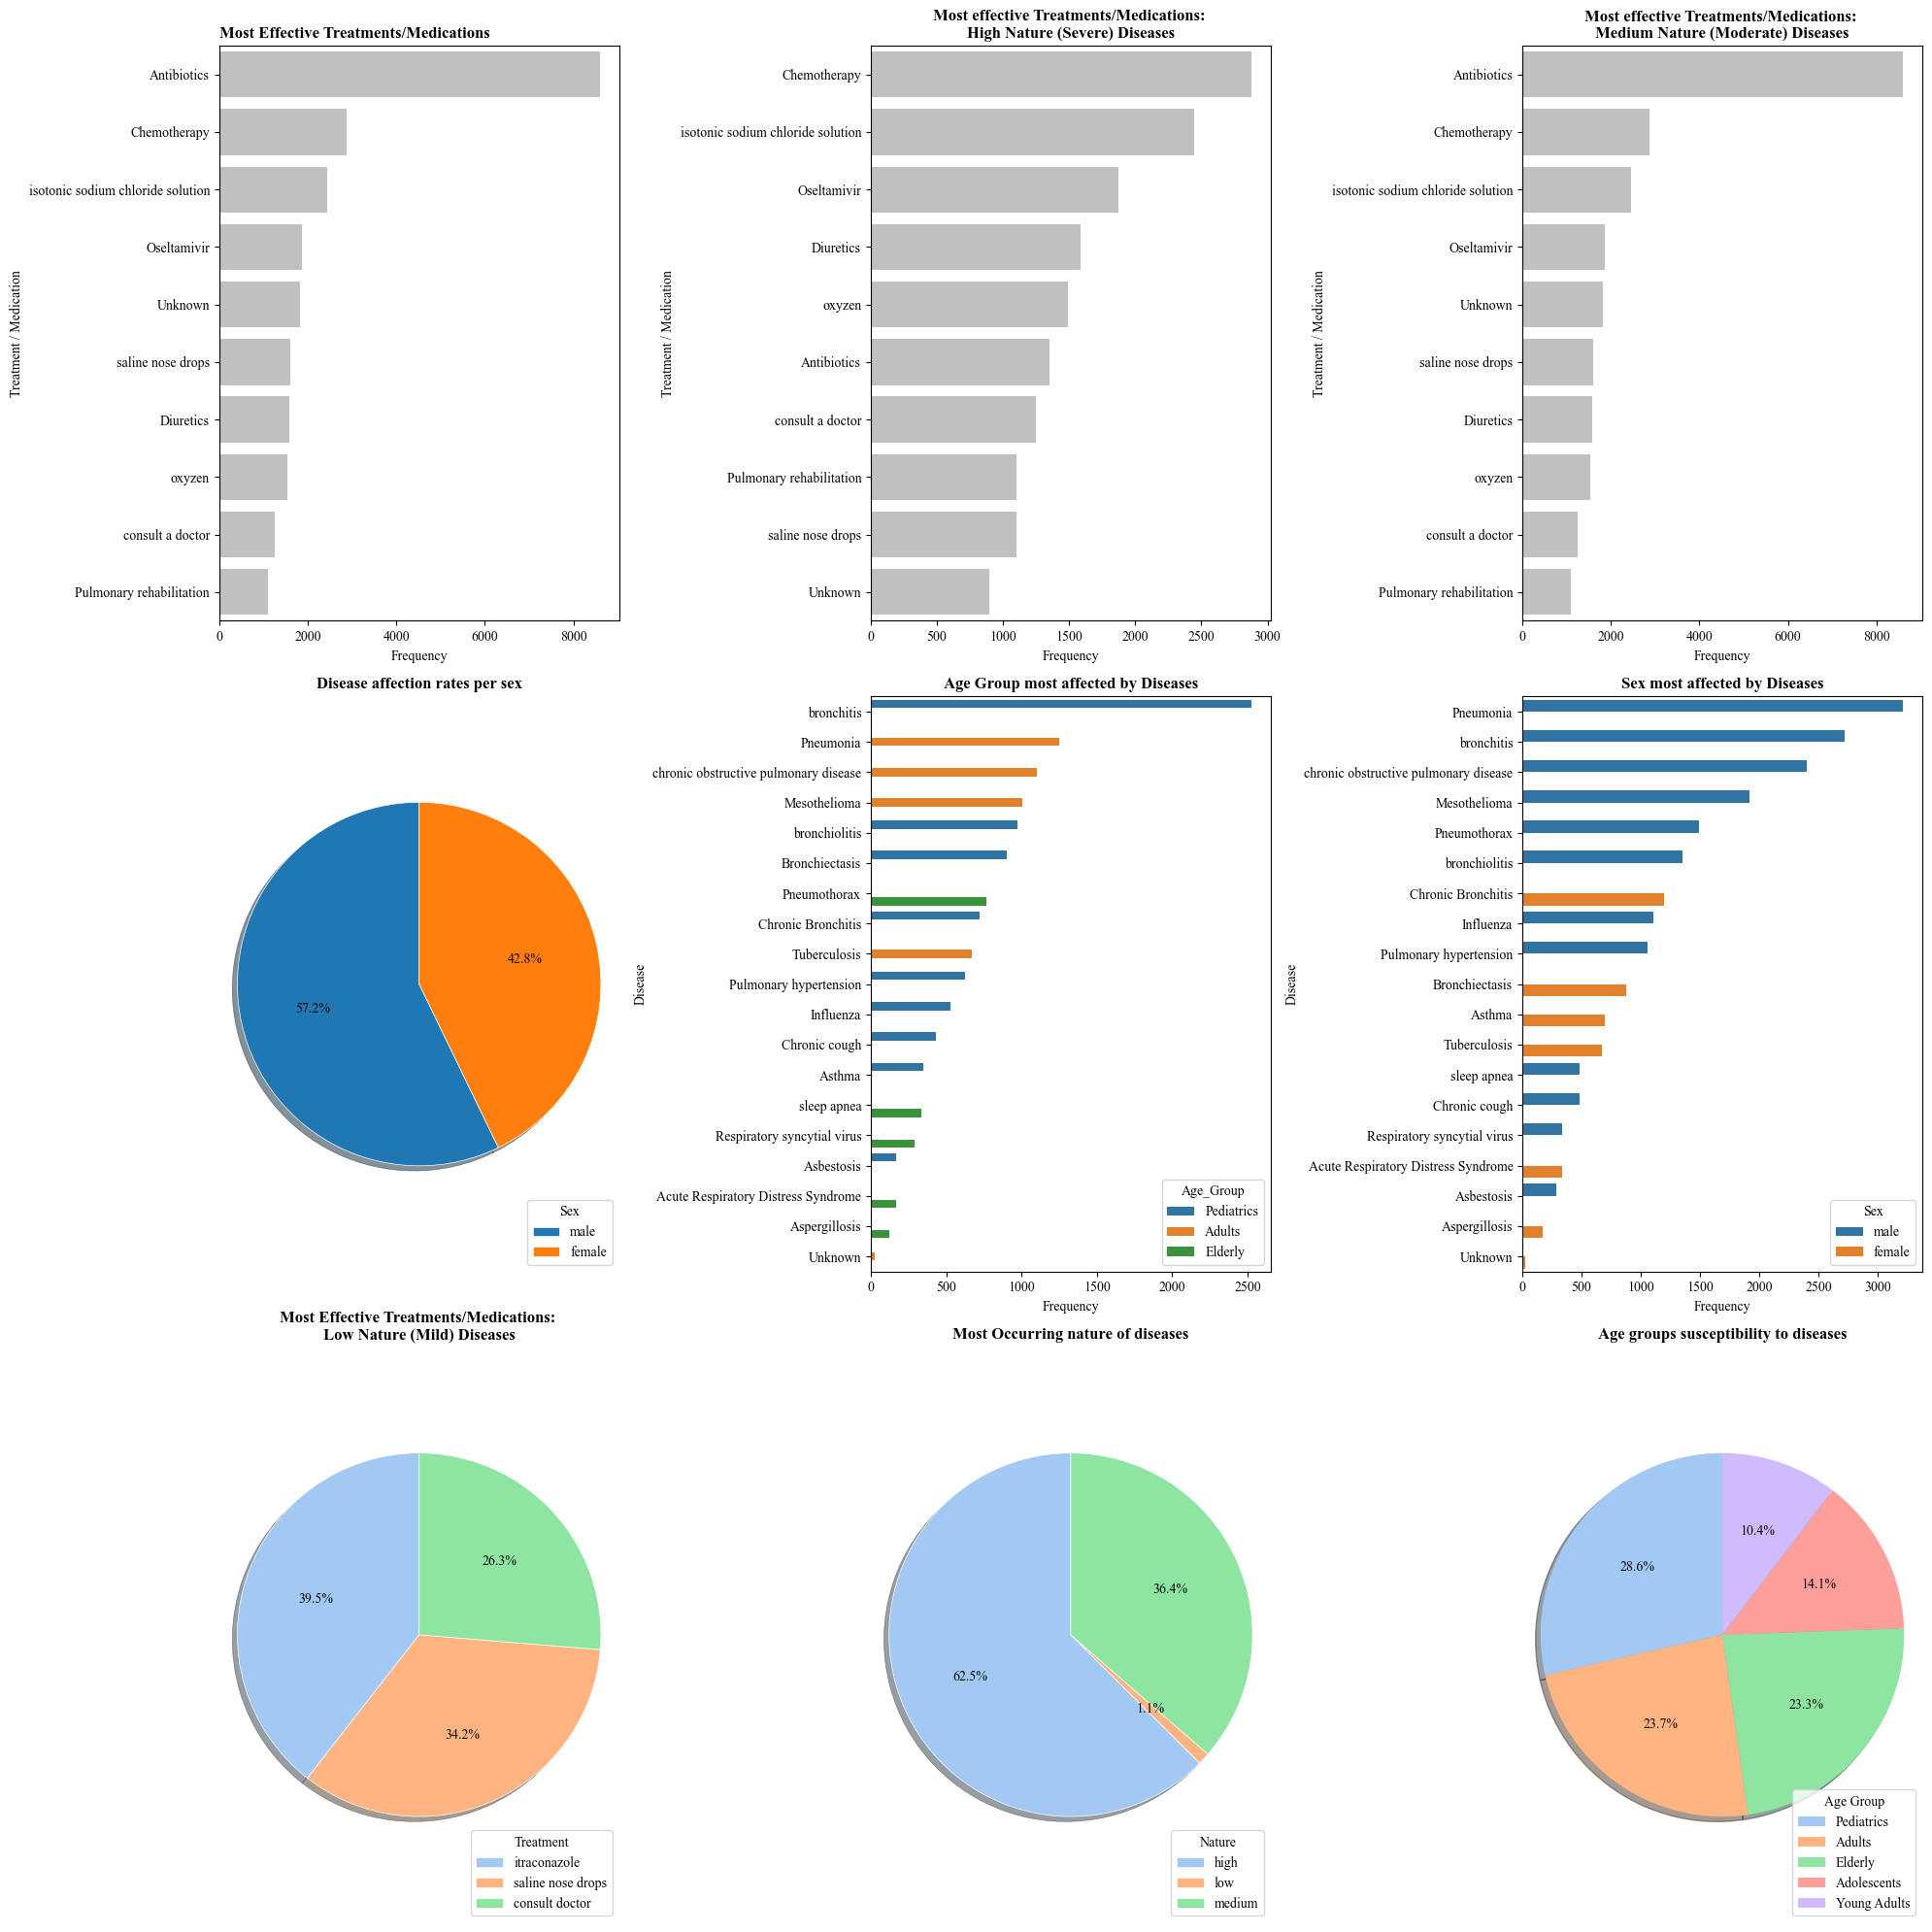

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Create a figure with subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# Plot 1
sns.barplot(x='Frequency', y='Treatment', data=Eff_T, color='silver', ax=axs[0, 0])
axs[0, 0].set_title('Most Effective Treatments/Medications', loc='left', fontweight='bold')
axs[0, 0].set_ylabel('Treatment / Medication')
axs[0, 0].spines['top'].set_visible(True)
axs[0, 0].spines['bottom'].set_visible(True)
axs[0, 0].spines['left'].set_visible(True)
axs[0, 0].spines['right'].set_visible(True)

# Plot 2
sns.barplot(x='Frequency', y='Treatment', data=Eff_H, color='silver', ax=axs[0, 1])
axs[0, 1].set_title('Most effective Treatments/Medications: \nHigh Nature (Severe) Diseases', loc='center', fontweight='bold')
axs[0, 1].set_ylabel('Treatment / Medication')
axs[0, 1].spines['top'].set_visible(True)
axs[0, 1].spines['bottom'].set_visible(True)
axs[0, 1].spines['left'].set_visible(True)
axs[0, 1].spines['right'].set_visible(True)

# Plot 3
sns.barplot(x='Frequency', y='Treatment', data=Eff_T, color='silver', ax=axs[0, 2])
axs[0, 2].set_title('Most effective Treatments/Medications: \nMedium Nature (Moderate) Diseases', loc='center', fontweight='bold')
axs[0, 2].set_ylabel('Treatment / Medication')
axs[0, 2].spines['top'].set_visible(True)
axs[0, 2].spines['bottom'].set_visible(True)
axs[0, 2].spines['left'].set_visible(True)
axs[0, 2].spines['right'].set_visible(True)

# Plot 4
axs[1, 0].pie(most_sex['disease_count'], autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
axs[1, 0].set_title('Disease affection rates per sex', fontweight='bold')
axs[1, 0].legend(title='Sex', labels=most_sex['Sex'], bbox_to_anchor=(1, 0), loc='lower right')
axs[1, 0].axis('equal')
axs[1, 0].spines['top'].set_visible(True)
axs[1, 0].spines['bottom'].set_visible(True)
axs[1, 0].spines['left'].set_visible(True)
axs[1, 0].spines['right'].set_visible(True)

# Plot 5
sns.barplot(y='Disease', x='Frequency', hue='Age_Group', data=Dis_AG, ax=axs[1, 1])
axs[1, 1].set_title('Age Group most affected by Diseases', fontweight='bold')
axs[1, 1].spines['top'].set_visible(True)
axs[1, 1].spines['bottom'].set_visible(True)
axs[1, 1].spines['left'].set_visible(True)
axs[1, 1].spines['right'].set_visible(True)

# Plot 6
sns.barplot(y='Disease', x='MaxAffectedCount', hue='Sex', data=Sex_aff, ax=axs[1, 2])
axs[1, 2].set_xlabel('Frequency')
axs[1, 2].set_title('Sex most affected by Diseases', fontweight='bold')
axs[1, 2].spines['top'].set_visible(True)
axs[1, 2].spines['bottom'].set_visible(True)
axs[1, 2].spines['left'].set_visible(True)
axs[1, 2].spines['right'].set_visible(True)

# Plot 7
colors = sns.color_palette('pastel')[0:len(Eff_T)]
axs[2, 0].pie(Eff_L['Frequency'], colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
axs[2, 0].set_title('Most Effective Treatments/Medications: \nLow Nature (Mild) Diseases', fontweight='bold')
axs[2, 0].legend(title='Treatment', labels=Eff_L['Treatment'], bbox_to_anchor=(1, 0), loc='lower right')
axs[2, 0].axis('equal')
axs[2, 0].spines['top'].set_visible(True)
axs[2, 0].spines['bottom'].set_visible(True)
axs[2, 0].spines['left'].set_visible(True)
axs[2, 0].spines['right'].set_visible(True)

# Plot 8
colors = sns.color_palette('pastel')
axs[2, 1].pie(c['Frequency'], colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
axs[2, 1].set_title('Most Occurring nature of diseases', fontweight='bold')
axs[2, 1].legend(title='Nature', labels=c['Nature'], bbox_to_anchor=(1, 0), loc='lower right')
axs[2, 1].axis('equal')
axs[2, 1].spines['top'].set_visible(True)
axs[2, 1].spines['bottom'].set_visible(True)
axs[2, 1].spines['left'].set_visible(True)
axs[2, 1].spines['right'].set_visible(True)

# Plot 9
colors = sns.color_palette('pastel')
axs[2, 2].pie(df['Frequency'], colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
axs[2, 2].set_title('Age groups susceptibility to diseases', fontweight='bold')
axs[2, 2].legend(title='Age Group', labels=df['Age_Group'], bbox_to_anchor=(1, 0), loc='lower right')
axs[2, 2].axis('equal')
axs[2, 2].spines['top'].set_visible(True)
axs[2, 2].spines['bottom'].set_visible(True)
axs[2, 2].spines['left'].set_visible(True)
axs[2, 2].spines['right'].set_visible(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [51]:
# Splitting the features and target variables
X = rst[['Disease', 'Age_Group', 'Sex']]  
y = rst['Nature']   

# Performing one-hot encoding on categorical variables
X = pd.get_dummies(X, drop_first=True)  

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logreg.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing the classification report
print(classification_report(y_test, y_pred))

c:\Users\Lord Bruts\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8937389770723104
              precision    recall  f1-score   support

        high       0.92      0.91      0.92      4200
         low       0.68      0.68      0.68        71
      medium       0.85      0.87      0.86      2533

    accuracy                           0.89      6804
   macro avg       0.82      0.82      0.82      6804
weighted avg       0.89      0.89      0.89      6804



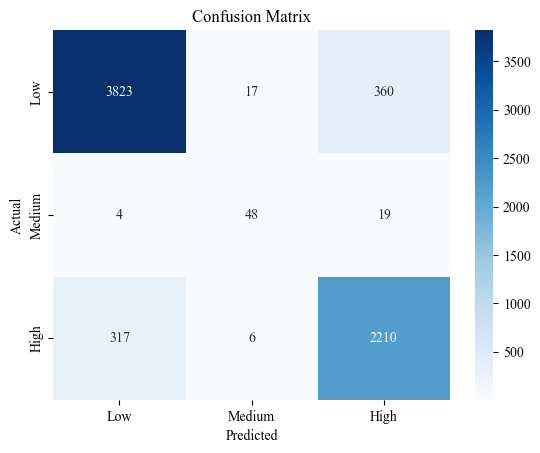

In [52]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a list of class labels
class_labels = ['Low', 'Medium', 'High']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [53]:
import joblib

# Save the trained ML model
joblib.dump(logreg, 'pred_model.joblib')

['pred_model.joblib']